# Intento fallido

In [2]:
# Importing the libraries
import configparser
import tweepy

# Read the config file
config = configparser.ConfigParser()
config.read('config.ini')

# Read the values
api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

In [3]:
# Authenticate
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [11]:
nombre_usuario = 'pagina12'
pagina12 = api.get_user(screen_name=nombre_usuario)

In [6]:
print('Cantidad de Seguidores: ' + str(pagina12.followers_count))
print('Nivel de actividad: ' + str(pagina12.statuses_count))

Cantidad de Seguidores: 536963
Nivel de actividad: 228195


followers_count
statuses_count
created_at

In [1]:
canales = ['pagina12', 'infobae', 'todonoticias', 'clarincom','LANACION', 'uno_minuto', 'filonewsOK', 'DiarioOle', 'TV_Publica', 'C5N', 'A24COM', 'canal26noticias', 'canal9oficial']

In [4]:
info_basica = dict()

In [5]:
for canal in canales:
    usuario = api.get_user(screen_name=canal)
    seguidores = usuario.followers_count
    actividad = usuario.statuses_count
    info_basica[canal] = (seguidores, actividad)

In [6]:
info_basica

{'pagina12': (536967, 228199),
 'infobae': (3492033, 1058321),
 'todonoticias': (5904716, 390858),
 'clarincom': (3504868, 591667),
 'LANACION': (3971839, 512519),
 'uno_minuto': (607, 0),
 'filonewsOK': (108158, 129252),
 'DiarioOle': (3712853, 366338),
 'TV_Publica': (1036154, 221658),
 'C5N': (3020613, 386876),
 'A24COM': (806207, 173850),
 'canal26noticias': (438682, 183825),
 'canal9oficial': (271271, 161840)}

In [7]:
info_canales_tuple = list(zip(list(info_basica.keys()),list(info_basica.values())))
canales_cant_seguidores = sorted(info_canales_tuple, key=lambda tup: tup[1][0])
canales_cant_publicaciones = sorted(info_canales_tuple, key=lambda tup: tup[1][1])
canales_cant_seguidores = sorted(info_canales_tuple, key=lambda tup: tup[1][0])
canales_cant_publicaciones = sorted(info_canales_tuple, key=lambda tup: tup[1][1])
cant_publicaciones_c = list(zip(*list(zip(*canales_cant_publicaciones))[1]))[1]
cant_seguidores = list(zip(*list(zip(*canales_cant_seguidores))[1]))[0]
labels_cant_seguidores = list(zip(*canales_cant_seguidores))[0]
labels_cant_publicaciones = list(zip(*canales_cant_publicaciones))[0]

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'Cantidad de seguidores')

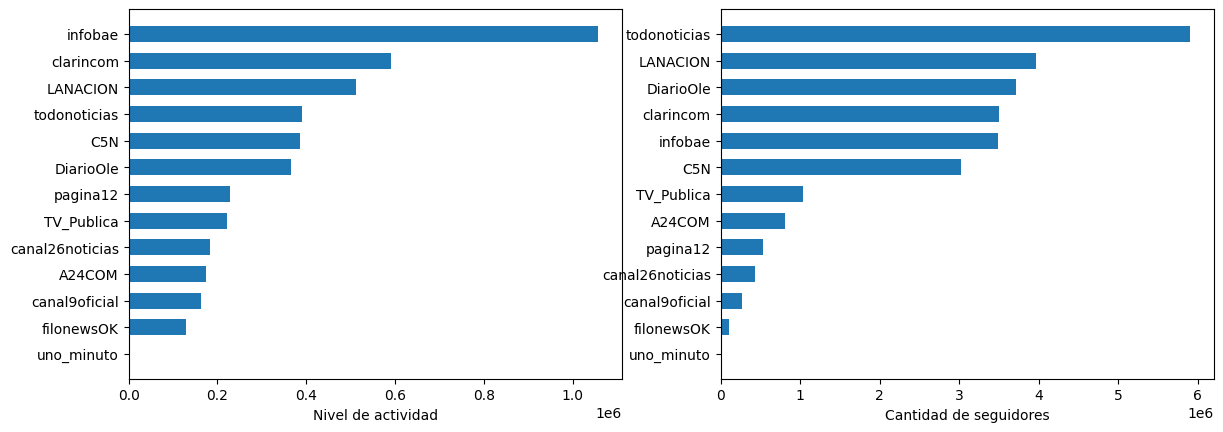

In [9]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(14)
axs[0].barh(labels_cant_publicaciones,cant_publicaciones_c,0.6)
axs[0].set_xlabel('Nivel de actividad')
axs[1].barh(labels_cant_seguidores,cant_seguidores,0.6)
axs[1].set_xlabel('Cantidad de seguidores')

In [16]:
tweets = api.user_timeline(screen_name='todonoticias', count=3, tweet_mode='extended')
tweets

Forbidden: 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product

In [14]:
import pandas as pd

In [ ]:
user = nombre_usuario
# Set the limit of number of records
limit=100

# Search using pagination
tweets = tweepy.Cursor(api.user_timeline, screen_name=user, tweet_mode='extended').items(limit)

# Create columns for the DataFrame
columns = ['Time', 'User', 'Tweet']
data = []

# Iterate through the results and append them to the list
for tweet in tweets:
    data.append([tweet.created_at, tweet.user.screen_name, tweet.full_text])

# Create a dataframe with the results
df = pd.DataFrame(data, columns=columns)

print(df)

In [ ]:
# Set the parameters for the search
user = 'CNBC'
# Set the number of pages
limit=3
# Counter for printing the page number
page_no = 1

# Search using pagination
pages = tweepy.Cursor(api.user_timeline, screen_name=user, tweet_mode='extended').pages(limit)

# Iterate through the pages and print the text of the tweets
for page in pages:    
    for i in range(len(page)):
        print(f"{i+1} {page[i].full_text} \n")
    print(f"*********End of Page {page_no}*********")
    page_no += 1